## Final Project Submission

Please fill out:
* **Student name:** 
* **Student pace:** self paced / part time / full time
* **Scheduled project review date/time:** 
* **Instructor name:** 


# 1. Understanding Business Problem

### 1.1 Problem Statement

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. 

### 1.2 Main Objective

The main objective is to analyze the current trends in the film industry and Identify the characteristics of successful films at the box office to provide actionable insights for Microsoft's new movie studio 

### 1.3 Specific Objectives

The focus is on the following 3 specific objectives:
<br>

1.  To analyze ***genre performance*** based on ***average rating*** 

2.  To understand the relationship between ***production budgets*** in relation to ***box office revenues***.

3. To explore how ***viewer ratings*** correlate with ***box office performance***.

# 2. Data Collection

This involves collecting the data sets that we are going to work with

### 2.1 Data Sources

Here we read the files that are relevant to the data that we are going to analyze. It involves reading data from sources such as:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Based on the specific objectives set out from the start the data sources we are going to use are:

* IMDB title Basics
* IMDB title Ratings
* The Numbers Movie Budget

### 2.2 Data Credibility


Iourny analysis, ensuring the credibility and reliability of the data is crucial for making sound business decision
tThis involves checking on:

- Data Completeness
- Data Consistency
- Data Accuracy
- Data Validity

In situations where the data credibility is affected:

- We check for missing values and duplicate values and clean them
- We ensure data formats are consistent i.e for currency its same all through the column
- We ensure data is accuratedgtion for Microsoft's decision-making process in their new movie studio venture.

### 2.3 Importing the relevant libraries

Importing relevant libraries for this project 

In [1]:
#importing of relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading csv files

def read_movie_data():
    # Read title basics data
    titleBasics = pd.read_csv("./zippedData/imdb.title.basics.csv.gz")
        
    # Read title ratings data
    titleRatings = pd.read_csv("./zippedData/imdb.title.ratings.csv.gz")
        
    # Read movie budget data
    movieBudget = pd.read_csv(r"C:\Users\Brian Nyagah\Desktop\Data Science\Pandas\gomycode_project_1\gomycode_project_1\zippedData\tn.movie_budgets.csv.gz")
        
    return titleBasics, titleRatings, movieBudget

titleBasics, titleRatings, movieBudget = read_movie_data()

# 3. Data Cleaning

This step involves cleaning the data and removing any missing or duplicate values

Also this will involve cleaning the data frames that we have selected

### 3.1 Merging Tables 

Firstly, we merge the tables that we are going to use in our analysis.

For our analysis we will merge 2 tables:

- titleBasics and titleRatings

In [3]:
#analyze the genre

#combine the two csv files first

#we will use a left join so as to take all the entries of tconst and not lose almost half the entries

titleBasicsAndRatings = pd.merge(titleBasics, titleRatings, on='tconst', how='left') 
titleBasicsAndRatings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


The two dataframes have been joined on the tconst column as it is the similar column. 

However use of the ***left join*** has made us take all the 146,144 rows but with a lot of missing values.

### 3.1 Missing Values

We check the data frames for any missing values

In [11]:
titleBasicsAndRatings.isnull().sum()

percentage_missing = titleBasicsAndRatings.isnull().sum() * 100 / len(titleBasicsAndRatings)
percentage_missing

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
averagerating      49.463543
numvotes           49.463543
dtype: float64

### 3.1.1 Missing Values - Primary Title

We will work with dealing with missing values of the primary title even though it is low.

We fill with `unknown` value

In [5]:
# missing values of the primary title

titleBasicsAndRatings['primary_title'].fillna('Unknown', inplace=True)

### 3.1.2 Missing Values - Original Title

We will work with dealing with missing values of the original title even though it is low.

We fill with the values of the `primary title`

In [14]:
# missing values of the original title

titleBasicsAndRatings['original_title'].fillna(titleBasicsAndRatings['primary_title'], inplace=True)

### 3.1.2 Missing Values - Runtime Minutes

We will work with dealing with missing values of theruntime minutes

We use the median value to fill the missing values .

In [15]:
#fill the missing values of the runtime minutes

median_runtime = titleBasicsAndRatings['runtime_minutes'].median()
titleBasicsAndRatings['runtime_minutes'].fillna(median_runtime, inplace=True)

### 3.1.3 Missing Values - Genres

We fill the missing genre values with Unknown as it has a very small percentage

In [17]:
# filling the missing genres

titleBasicsAndRatings['genres'].fillna('Unknown', inplace=True)


### 3.1.4 Missing Values - Average Rating and Numvotes

Filling With Mean 


In [19]:
# filling the missing genres

mean_rating = titleBasicsAndRatings['averagerating'].mean()
mean_votes = titleBasicsAndRatings['numvotes'].mean()

titleBasicsAndRatings['averagerating'].fillna(mean_rating, inplace=True)
titleBasicsAndRatings['numvotes'].fillna(mean_votes, inplace=True)


### 3.1.5 Check if Missing Values are Filled

In [21]:
# checking for the missing values

titleBasicsAndRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [23]:
# checking for the missing values

titleBasicsAndRatings.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [7]:
movieBudget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### 3.2 Duplicate Values

We check the data frame for any duplicate values and if present we remove the duplicate values

In [24]:
#check for duplicate values

titleBasicsAndRatings.duplicated().any()

False

In [10]:
movieBudget.duplicated().any()

False

# 4. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is used on the one hand to answer questions, test business assumptions, generate hypotheses for further analysis. On the other hand, you can also use it to prepare the data for modeling. 

### 4.1 Basic Description of the Data

This is one of the most elementary steps to do this is by getting a basic description of your data and we use the describe() function to get various summary statistics that exclude NaN values.

In [25]:
titleBasicsAndRatings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,146144.000000,146144.000000,1.461440e+05
mean,2014.621798,86.363758,6.332729,3.523662e+03
std,2.733583,147.191650,1.048544,2.153565e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,6.332729,4.800000e+01
50%,2015.000000,87.000000,6.332729,3.523662e+03
75%,2017.000000,95.000000,6.500000,3.523662e+03
max,2115.000000,51420.000000,10.000000,1.841066e+06


s

#### `start_yeax)**: 2115

**Description**: 
The `start_year` column represents the release year of the movies. The data spans from the year 2010 to 2115, with the majority of movies released between 2012 and 2017. The mean year of release is appimately 2014.62, indicating a focus on more recent films.

#### ` (max)**: 51,420 minutes

**Description**: 
The `runtime_minutes` column indicates the length of the movies in minutes. The mean runtime is approximately 86.36 minutes. However, the standard deviation is quite high (147.19 minutes), indicating a wide range of movie lengths. The data includes some extreme outliers, such as a maximum runtime of 51,420 minutes, which might be erroneous. Most movies have a runtime between 75 and 95 min)**: 6.50
- **Maximum (max)**: 10.00

**Description**: 
The `averagerating` column represents the average rating of the movies. The mean rating is 6.33, with a standard deviation of 1.05. Ratings range from a minimum of 1 to a maximum of 10. The 25th and 50th percentiles are both 6.33, indicating that a significant number of movies have this exact rating, which may suggest a need for f523.66 votes
- **Maximum (max)**: 1,841,066 votes

**Description**: 
The `numvotes` colusuggests that the number of votes varies widely across different movies.cating significant variability in the number of votes. The data includes movies ealidation might be necessary to ensure accurate analysis.

In [25]:
movieBudget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000



- There are 5,782 entries in this column.
- The average value is 50.37. 
- The standard deviation is 28.82, indicating there are near the mean
- The smallest value in the dataset is 1 million
- 25% of the movies have values of 25 or below.
- The median value is 50, meaning that half of the movies have values below 50 and half above. 
- 75% of the movies have values of 75 or below.
- The highest value in the dataset is 100. This indicates that the maximum budget or financial measure recorded is 100 units.


- The data appears to be relatively symmetrically distributed around the mean and median.




### 4.2 First and Last Data Frame Rows

Here we take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library

In [26]:
#we check the head of the data frame

titleBasicsAndRatings.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.000000
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.000000
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6.332729,3523.662167
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.000000
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.100000,263.000000
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History",6.332729,3523.662167
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,6.332729,3523.662167


In [14]:
#we check the head of the data frame


movieBudget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [27]:
#we check the last 10 rows of the data frame

titleBasicsAndRatings.tail(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.500000,11.000000
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,6.332729,3523.662167
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,6.332729,3523.662167
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",6.332729,3523.662167
146138,tt9916428,The Secret of China,The Secret of China,2019,87.0,"Adventure,History,War",6.332729,3523.662167
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,6.332729,3523.662167
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary,6.332729,3523.662167
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy,6.332729,3523.662167
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,Unknown,6.332729,3523.662167
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,87.0,Documentary,6.332729,3523.662167


In [18]:
#we check the last 10 rows of the data frame


movieBudget.tail(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


### 4.3 Checking the shape of the data frames

The shape property returns a tuple containing the shape of the DataFrame.

The shape is the number of rows and columns of the DataFrame

In [29]:
titleBasicsAndRatings.shape

print (f"The number of rows for the title Basics dataframe is {titleBasicsAndRatings.shape[0]} and the number of columns is {titleBasicsAndRatings.shape[1]}")

The number of rows for the title Basics dataframe is 146144 and the number of columns is 8


In [12]:
movieBudget.shape

print (f"The number of rows for the movie Budget dataframe is {movieBudget.shape[0]} and the number of columns is {movieBudget.shape[1]}")

The number of rows for the movie Budget dataframe is 5782 and the number of columns is 6


### 4.4 Checking the info of the data frame

The .info() function allows one to get the info about the data frame. The data types and the number of entries and the columns available in set data frame

In [30]:
#check the info of the data frame

titleBasicsAndRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB




- **Total Entries**: 146,144
- **Columns**: 6 (`tconst`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`)


1. **Data Completeness**:
   - The `tconst`, `start_year`, and `primary_title` columns are nearly complete, with only `primary_title` missing one entry.

2. **Data Quality**:
   - The high completeness of the `tconst` and `start_year` columns suggests good data.
   - The missing values in `primary_title` and `original_title` will require data cleaning or validation.


In [15]:
#check the info of the data frame


movieBudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


e

- **Total Entries**: 5,782
- **Columns**: 6 (`id`, `release_date`, `movie`, `production_budget`, `domestic_gross`, `worldwide_gr

### Insights and Considerations

1. **Data Completeness**:
   - All columns are complete with no missing values, enabling comprehensive analysis without the need for imputation.

2. **Data Quality and Preparation**:
   - **Type Conversion**: The `release_date`, `production_budget`, `domestic_gross`, and `worldwide_gross` columns need to bso as to work with themiahing these aspects can help understand the dynamics of movie production and revenue generation.

### 4.5 Analysis and Correlation

#### 4.5.1 Genre Popularity

Analyze the frequency of different genres in successful movies 

In [34]:
#check the average rating vs genre

genre_avg_rating = titleBasicsAndRatings.groupby('genres')['averagerating'].mean().reset_index()

# Sort the DataFrame by average rating in descending order
genre_avg_rating.sort_values(by='averagerating', ascending=False, inplace=True)

# Display the DataFrame showing how genres and average rating relate
genre_avg_rating.head(20)

,genres,averagerating
1024,"Music,Mystery",9.000000
774,"Documentary,News,Reality-TV",8.800000
536,"Comedy,Drama,Reality-TV",8.800000
14,"Action,Adventure,Musical",8.700000
213,"Adventure,Crime",8.500000
1045,"Mystery,News,Thriller",8.400000
1022,"Music,Musical,Romance",8.400000
302,"Adventure,Romance,Sci-Fi",8.300000
569,"Comedy,History,Musical",8.300000
1035,"Musical,Mystery,Sci-Fi",8.200000


- According to our analysis it is clear that Music and Mystrey movies have a large rating and Microsoft movies should focus on making such movies to gain success.



The visulaization to show the top genres vs the rating is as below:

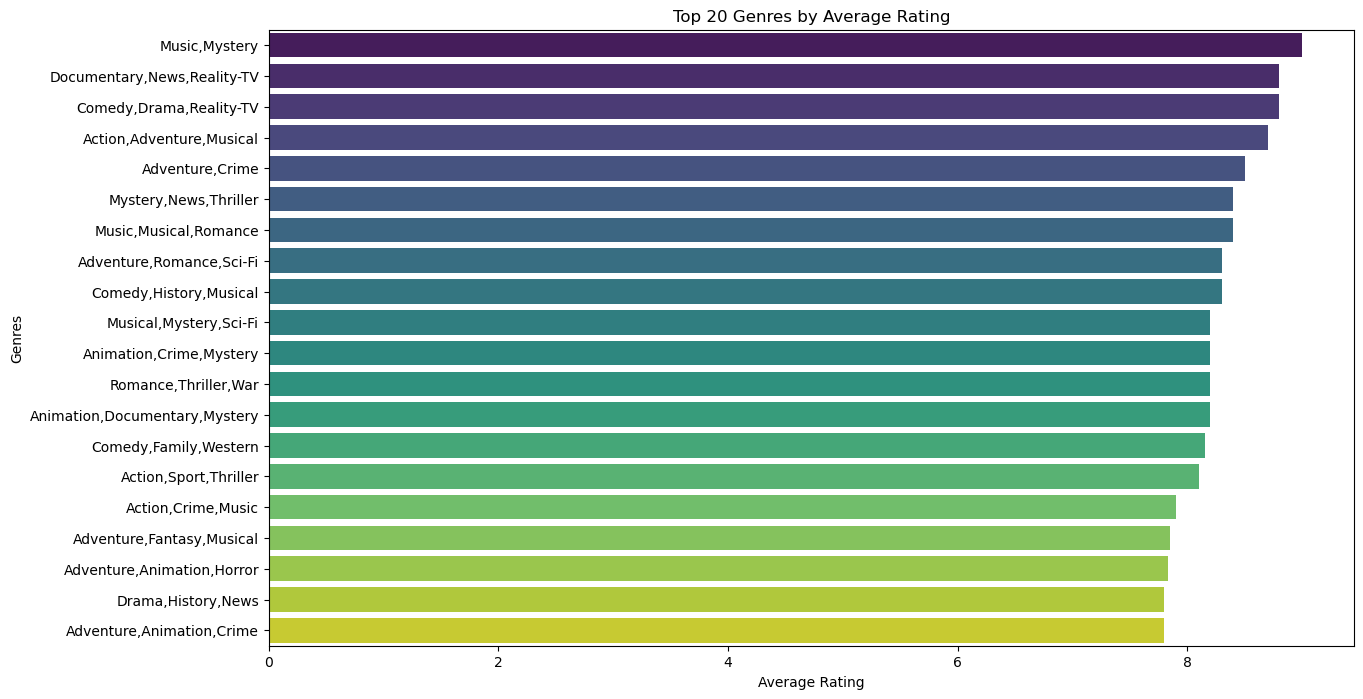

In [35]:
# Set the plot size 
plt.figure(figsize=(14, 8))

# Create the bar plot 
sns.barplot(x='averagerating', y='genres', data=genre_avg_rating.head(20), palette='viridis')

# Add labels and title to the plot
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Top 20 Genres by Average Rating')

# Show the plot
plt.show()

#### 4.5.2 Budget vs Revenue

I will examine the relationship between production budgets and box office revenues to identify which budget ranges tend to generate the highest returns.

In [36]:
#calculate the ROI from budget and revenue domestic and worldwide

#convert the columns to strings first

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to string
movieBudget['production_budget'] = movieBudget['production_budget'].astype(str)
movieBudget['domestic_gross'] = movieBudget['domestic_gross'].astype(str)
movieBudget['worldwide_gross'] = movieBudget['worldwide_gross'].astype(str)

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movieBudget['production_budget'] = movieBudget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movieBudget['domestic_gross'] = movieBudget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movieBudget['worldwide_gross'] = movieBudget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit and profit margin
movieBudget['profit'] = movieBudget['worldwide_gross'] - movieBudget['production_budget']
movieBudget['profit_margin'] = (movieBudget['profit'] / movieBudget['production_budget']) * 100

# Calculate return on investment (ROI)
movieBudget['ROI'] = (movieBudget['profit'] / movieBudget['production_budget']) * 100

# Display the first 10 rows of the DataFrame with the new columns
movieBudget.head(10)




,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.257713,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.667286,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.210757,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.384139,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.369636,315.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,571.016739,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.711400,582.711400
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,221.140142,221.140142
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.648403,118.648403
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,193.206974,193.206974


*  Movies with large production budgets, such as "Avatar" and "Star Wars Ep. VII: The Force Awakens," show that there high profits and high returns on investment (ROI). 

### 4.5.2.1 Visualization For ROI

C:\Users\Brian Nyagah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


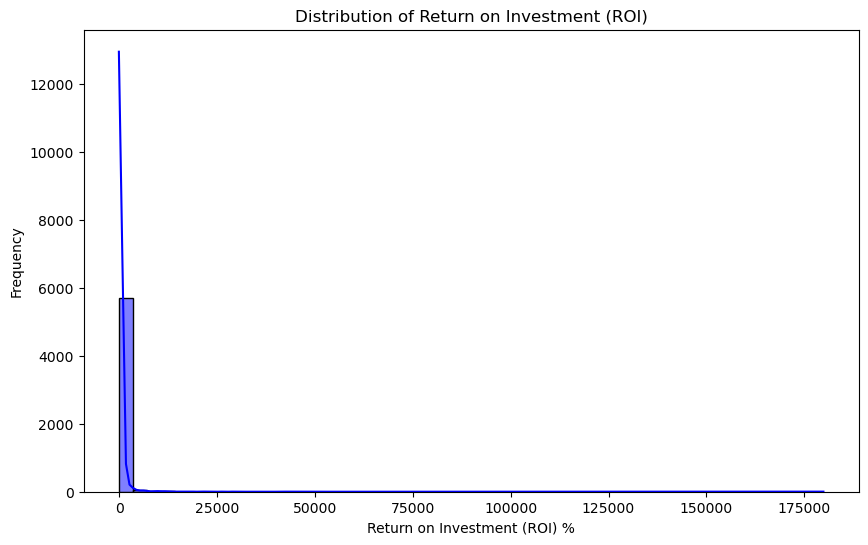

In [37]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a histogram for ROI
sns.histplot(movieBudget['ROI'], bins=50, kde=True, color='blue')

# Add labels and title
plt.xlabel('Return on Investment (ROI) %')
plt.ylabel('Frequency')
plt.title('Distribution of Return on Investment (ROI)')

# Show the plot
plt.show()

### 4.5.2.2 Visualization For Profit vs Production Budget

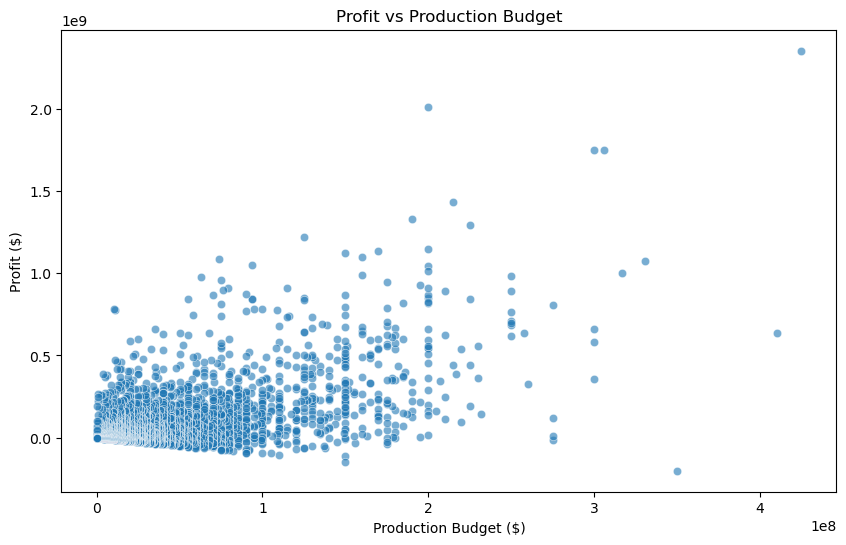

In [38]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot 
sns.scatterplot(x='production_budget', y='profit', data=movieBudget, alpha=0.6)

# Add labels and title
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit ($)')
plt.title('Profit vs Production Budget')

# Show the plot
plt.show()

### 4.5.2.3 Visualization For Top Movies by ROI

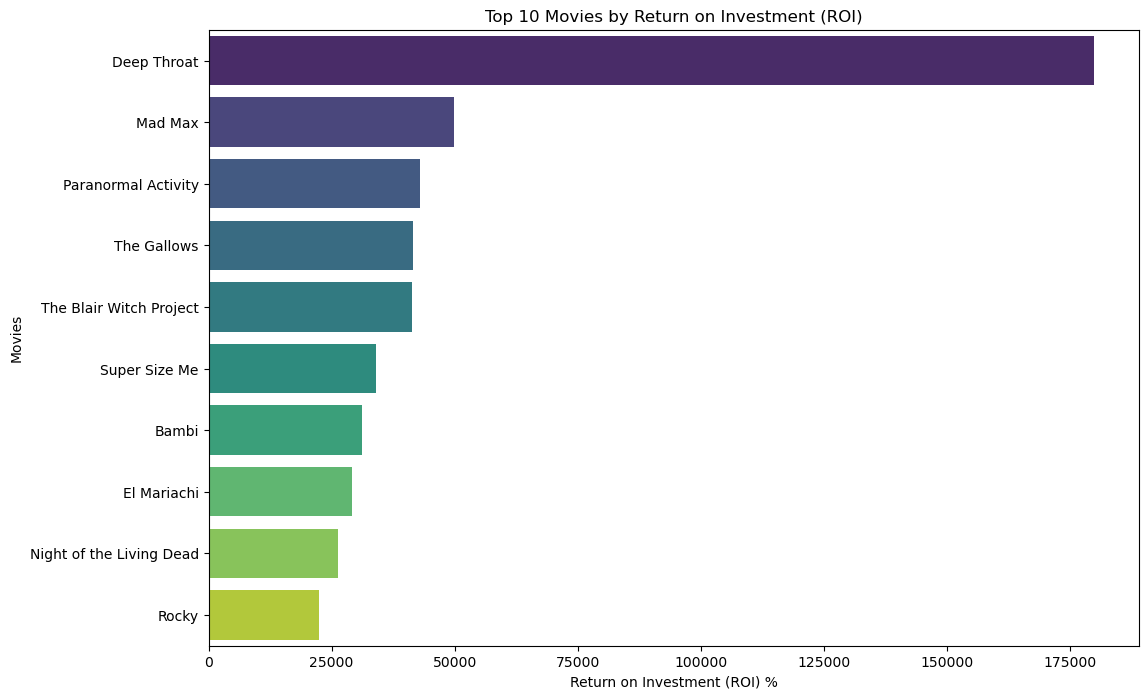

In [41]:
# Sort the DataFrame by ROI in descending order and get the top 10 movies
top_10_roi = movieBudget.sort_values(by='ROI', ascending=False).head(10)

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a bar plot 
sns.barplot(x='ROI', y='movie', data=top_10_roi, palette='viridis')

# Add labels and title
plt.xlabel('Return on Investment (ROI) %')
plt.ylabel('Movies')
plt.title('Top 10 Movies by Return on Investment (ROI)')

# Show the plot
plt.show()